In [80]:
import pandas as pd
import random

In [81]:
url="https://raw.githubusercontent.com/AmenaNajeeb/Data/master/bigmart_data.csv"
df=pd.read_csv(url)

In [82]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [83]:
import numpy as np

In [84]:
x=np.random.randint(6,20)

In [85]:
df["Item_Weight"][np.isnan(df["Item_Weight"])]=x

<ipython-input-85-b135293f9c0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Item_Weight"][np.isnan(df["Item_Weight"])]=x


In [86]:
df["Outlet_Size"]=df["Outlet_Size"].fillna("Medium")

In [87]:
def label_encode(size):
    if(size=="Medium"):
        label=0
    elif(size=="Small"):
        label=1
    else:
        label=2
    return label

In [88]:
df["Outlet_Size"]=df["Outlet_Size"].apply(label_encode)

In [89]:
def label_encode(type):
  if(type=="Tier 1"):
     label=0
  elif(type=="Tier 2"):
     label=1
  else:
     label=2
  return label

In [90]:
df["Outlet_Location_Type"]=df["Outlet_Location_Type"].apply(label_encode)

In [91]:
del df["Outlet_Identifier"]

In [92]:
del df["Item_Fat_Content"]

In [93]:
del df["Item_Identifier"]

In [94]:
x=df.drop(["Item_Weight","Item_Type","Item_Outlet_Sales","Outlet_Type"],axis=1)
y=df["Item_Outlet_Sales"]

In [95]:
df.isna().sum()

Item_Weight                  0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
from sklearn.tree import DecisionTreeRegressor

In [98]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.15,random_state=100)

In [99]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [100]:
y_pred=model.predict(x_test)

In [101]:
print("Training Accuracy:",model.score(x_train,y_train))
print("Testing Accuracy:",model.score(x_test,y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.15841963991134722


In [102]:
x=df.drop(["Outlet_Establishment_Year","Item_Type","Item_Outlet_Sales","Outlet_Type"],axis=1)
y=df["Item_Outlet_Sales"]

In [103]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.15,random_state=100)

In [104]:
model=DecisionTreeRegressor(max_depth=100,min_samples_leaf=100,min_impurity_decrease=0.2)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=100, min_impurity_decrease=0.2,
                      min_samples_leaf=100)

In [105]:
y_pred=model.predict(x_test)

In [106]:
print("Training Accuracy:",model.score(x_train,y_train))
print("Testing Accuracy:",model.score(x_test,y_test))

Training Accuracy: 0.4479270852416565
Testing Accuracy: 0.40700558271321163


In [107]:
x=df.drop(["Outlet_Establishment_Year","Item_Type","Item_Outlet_Sales","Outlet_Type"],axis=1)
y=df["Item_Outlet_Sales"]

In [108]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=100)

In [109]:
model=DecisionTreeRegressor(max_depth=15,min_samples_leaf=50)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=50)

In [110]:
y_pred=model.predict(x_test)

In [111]:
print("Training Accuracy:",model.score(x_train,y_train))
print("Testing Accuracy:",model.score(x_test,y_test))

Training Accuracy: 0.5061431348616563
Testing Accuracy: 0.4467614313094592


In [112]:
x=df.drop(["Item_Visibility","Item_Type","Item_Outlet_Sales","Outlet_Type"],axis=1)
y=df["Item_Outlet_Sales"]

In [113]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=100)

In [114]:

model=DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

In [115]:
y_pred=model.predict(x_test)

In [116]:
print("Training Accuracy:",model.score(x_train,y_train))
print("Testing Accuracy:",model.score(x_test,y_test))

Training Accuracy: 0.5594464585112462
Testing Accuracy: 0.5331213144987673


In [117]:
x=df.drop(["Item_Weight","Item_Type","Outlet_Type"],axis=1)
y=df["Item_Outlet_Sales"]

In [118]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.15,random_state=100)

In [119]:
model=DecisionTreeRegressor(max_depth=16,min_samples_leaf=50)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=16, min_samples_leaf=50)

In [120]:
y_pred=model.predict(x_test)

In [121]:
print("Training Accuracy:",model.score(x_train,y_train))
print("Testing Accuracy:",model.score(x_test,y_test))

Training Accuracy: 0.9963989430238923
Testing Accuracy: 0.9976809606942563


In [124]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Item sales')

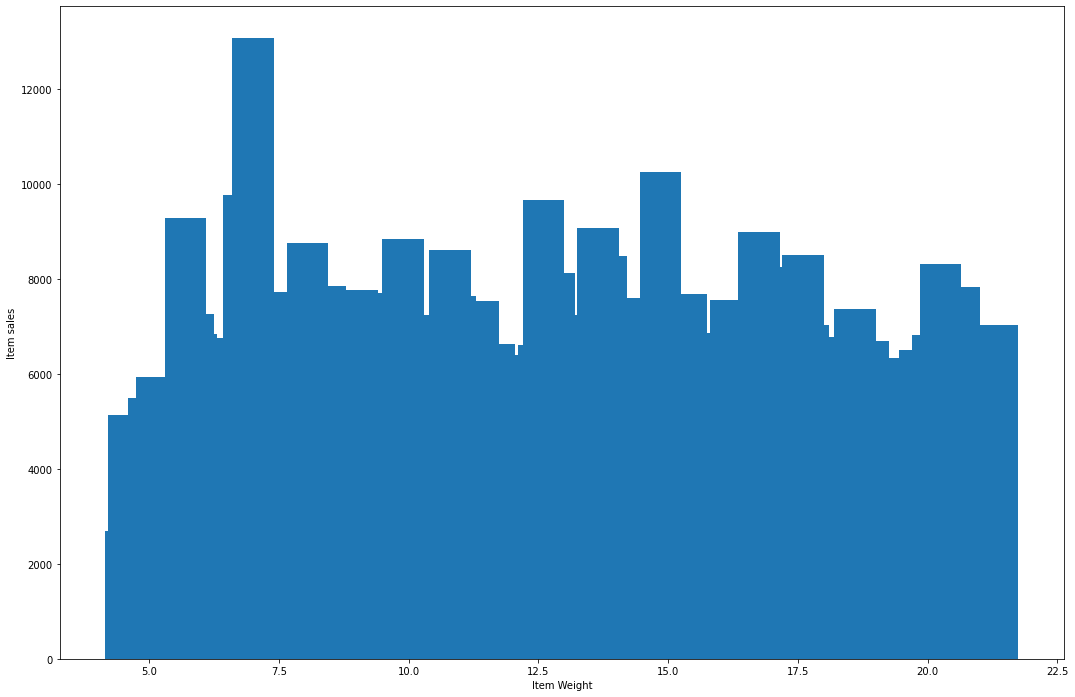

In [126]:
plt.figure(figsize=(18,12))
plt.bar(df['Item_Weight'],df['Item_Outlet_Sales'])
plt.xlabel("Item Weight")
plt.ylabel("Item sales")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

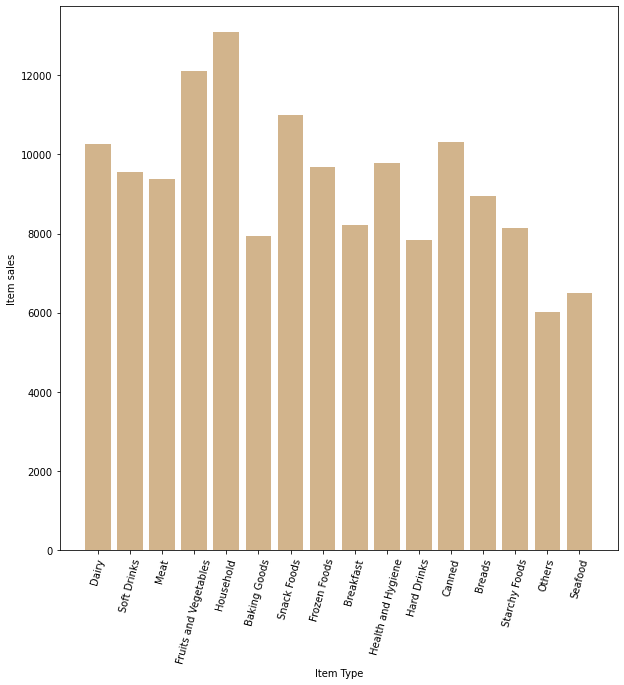

In [129]:
plt.figure(figsize=(10,10))
plt.bar(df['Item_Type'],df['Item_Outlet_Sales'],color="Tan")
plt.xlabel("Item Type")
plt.ylabel("Item sales")
plt.xticks(rotation=75)

Text(0.5, 0, 'Item Outlet Sales')

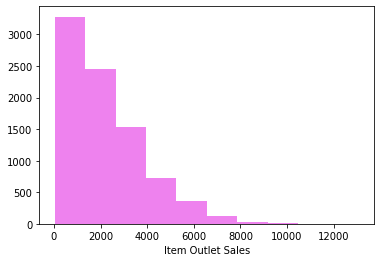

In [132]:
plt.hist(df["Item_Outlet_Sales"],color="violet")
plt.xlabel("Item Outlet Sales")